In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from afinn import Afinn
import math
import pandas as pd
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
from textblob import TextBlob
import datetime
plt.style.use('fivethirtyeight')

In [2]:
bitcoin_tweets_df = pd.read_csv(
    'Data/tweets/Bitcoin_tweets_min.csv', encoding='ascii', parse_dates=True)

In [3]:
bitcoin_tweets_df['date']=pd.to_datetime(bitcoin_tweets_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [4]:
bitcoin_tweets_df = bitcoin_tweets_df.sort_values(by='date') 

In [7]:
def get_polarity(tweet):
    return TextBlob(tweet).sentiment.polarity


def get_subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

In [8]:
bitcoin_tweets_df["subjectivity"] = bitcoin_tweets_df["text"].apply(get_subjectivity)
bitcoin_tweets_df['polarity'] = bitcoin_tweets_df["text"].apply(get_polarity)

In [12]:
def get_sentiment(score):
    if score < 0:
        return "negative"
    elif score == 0: 
        return "neutral"
    elif score > 0: 
        return "positive"

In [7]:
def get_sentiment_value(score):
    if score < 0:
        return -1
    elif score == 0: 
        return 0
    elif score > 0: 
        return 1

In [13]:
bitcoin_tweets_df["sentiment"] = bitcoin_tweets_df["polarity"].apply(get_sentiment)

In [19]:
analyzer = SentimentIntensityAnalyzer()
compound = []
pos=[]
neg=[]
neu=[]
for i,s in enumerate(tqdm(bitcoin_tweets_df['text'])):
    vs = analyzer.polarity_scores(s)
    pos.append(vs["pos"])
    neg.append(vs["neg"])
    neu.append(vs["neu"])
    compound.append(vs["compound"])
bitcoin_tweets_df["vader_pos"] = pos
bitcoin_tweets_df["vader_neg"] = neg
bitcoin_tweets_df["vader_neu"] = neu
bitcoin_tweets_df["vader_compound"] = compound

100%|███████████████████████████████████████████████████████████████████████| 875904/875904 [01:22<00:00, 10644.72it/s]


,date,text,is_retweet,subjectivity,polarity,sentiment,compound
21523,2021-02-05 10:52:04,Debunking Bitcoin Myths by Patrick Lowry cryp...,False,0.0,0.0,neutral,0.0000
21524,2021-02-05 10:52:04,Weekend Read Keen to learn about crypto asset...,False,0.0,0.0,neutral,0.4939


In [88]:
afinn = Afinn()

def get_affin_score(tweet):
    return afinn.score(tweet)

bitcoin_tweets_df["afinn_score"]  = bitcoin_tweets_df["text"].apply(get_affin_score)

In [93]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [94]:
bitcoin_tweets_df.columns=['date', 'text', 'is_retweet', 'subjectivity', 'polarity', 'sentiment',
       'compound', 'afin_score']

In [121]:
for dates in list(chunks(sorted(set(bitcoin_tweets_df.date.dt.date.tolist())), 10)):
    mask = (bitcoin_tweets_df['date'].dt.date >= dates[0]) & (bitcoin_tweets_df['date'].dt.date <= dates[-1])
    df=bitcoin_tweets_df.loc[mask]
    filename='Data/tweets/bitcoin_tweets_cleaned_sent_'+str(dates[0])+'_'+str(dates[-1])+'.csv'
    df.to_csv(filename, header=True, index=False)

In [122]:
bitcoin_tweets_df.to_csv('Data/tweets/bitcoin_tweets_cleaned_sent.csv', header=True, index=False)

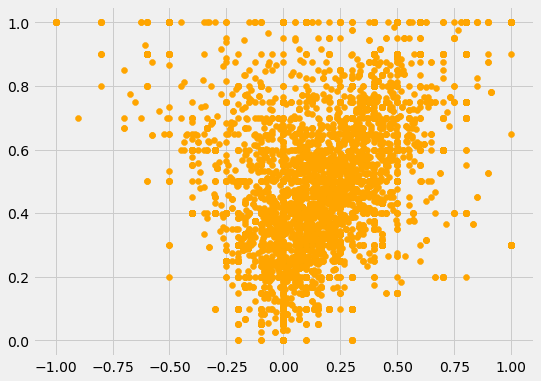

In [16]:
plt.figure(figsize=(8, 6))
for i in range(0, bitcoin_tweets_df.shape[0]):
    plt.scatter(bitcoin_tweets_df["polarity"][i], bitcoin_tweets_df["subjectivity"][i], color="Orange")
plt.title("Bitcoin Tweets Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

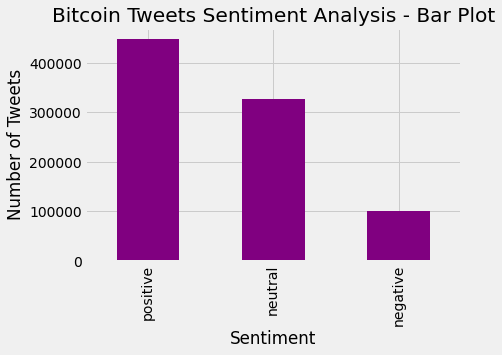

In [18]:
bitcoin_tweets_df["sentiment"].value_counts().plot(kind="bar", color="Purple")
plt.title("Bitcoin Tweets Sentiment Analysis - Bar Plot")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

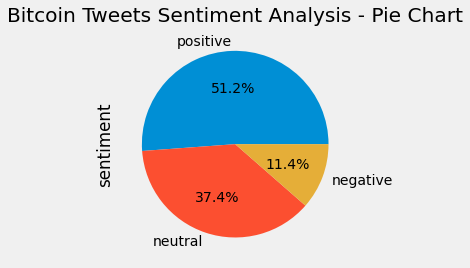

In [17]:
bitcoin_tweets_df["sentiment"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Bitcoin Tweets Sentiment Analysis - Pie Chart")
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


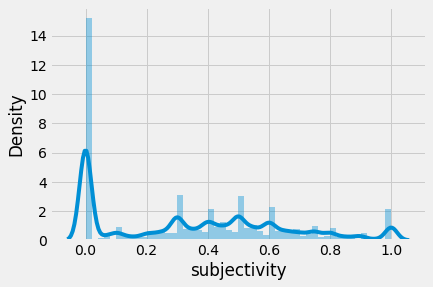

In [104]:
sns.distplot(bitcoin_tweets_df["subjectivity"])
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


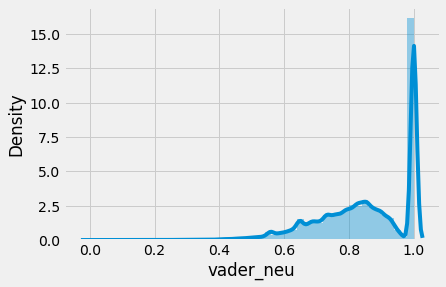

In [111]:
sns.distplot(bitcoin_tweets_df["vader_neu"])
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


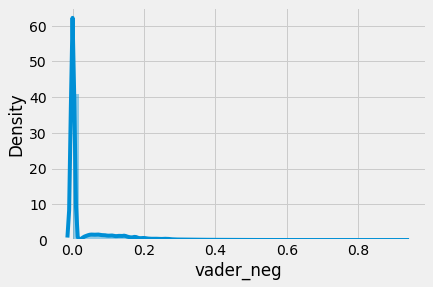

In [112]:
sns.distplot(bitcoin_tweets_df["vader_neg"])
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


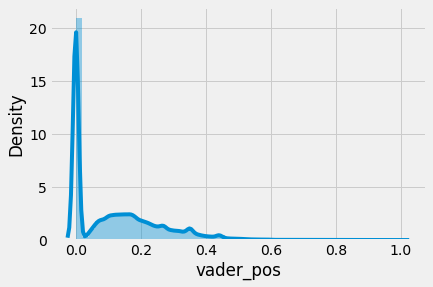

In [113]:
sns.distplot(bitcoin_tweets_df["vader_pos"])
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


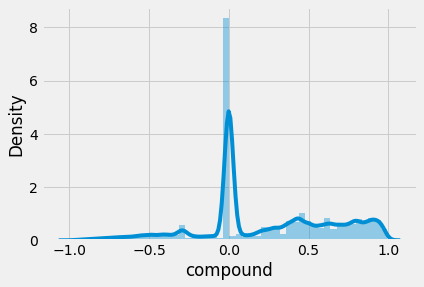

In [103]:
sns.distplot(bitcoin_tweets_df["vader_compound"])
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


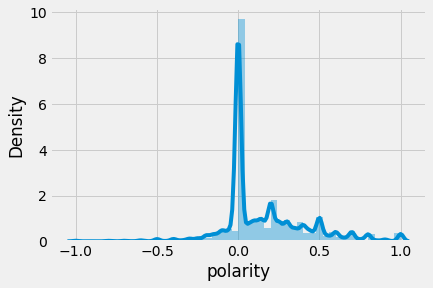

In [102]:
sns.distplot(bitcoin_tweets_df["polarity"])
plt.show()

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


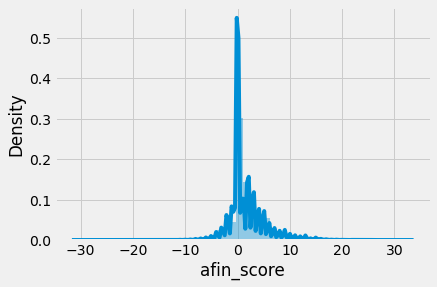

In [100]:
sns.distplot(bitcoin_tweets_df["afinn_score"])
plt.show()

In [2]:
bitcoin_tweets_df = pd.read_csv(
    'Data/tweets/bitcoin_tweets_cleaned_sent.csv', encoding='ascii', parse_dates=True)
bitcoin_tweets_df['date']=pd.to_datetime(bitcoin_tweets_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

c:\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


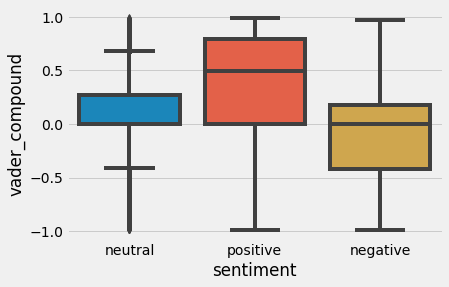

<Figure size 864x648 with 0 Axes>

In [5]:
ax = sns.boxplot( x= bitcoin_tweets_df["sentiment"], y = bitcoin_tweets_df["vader_compound"])
plt.figure(figsize=(12,9))
plt.show()

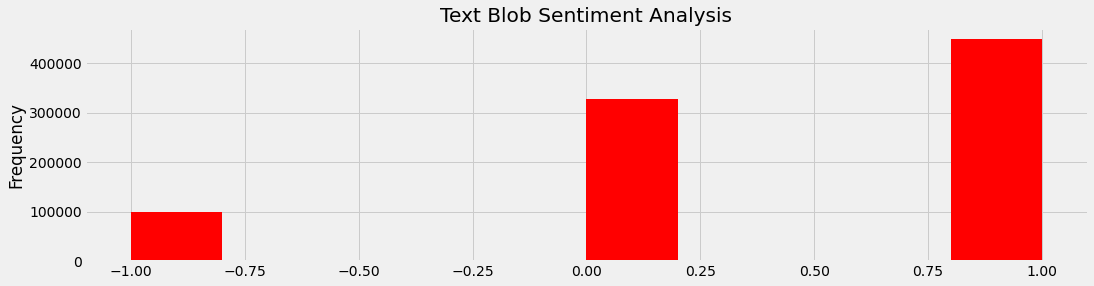

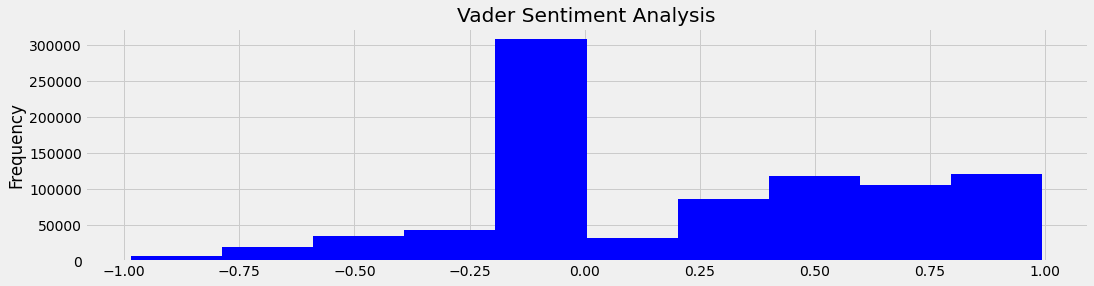

In [9]:
time_tb = pd.Series(data=bitcoin_tweets_df['sentiment_value'].values, index=bitcoin_tweets_df['date'])
time_tb.plot(kind='hist',figsize=(16, 4), color='r',title = 'Text Blob Sentiment Analysis')
plt.show()
    
time_vd = pd.Series(data=bitcoin_tweets_df['vader_compound'].values, index=bitcoin_tweets_df['date'])
time_vd.plot(kind='hist',figsize=(16, 4), color='b', title = 'Vader Sentiment Analysis')
plt.show()

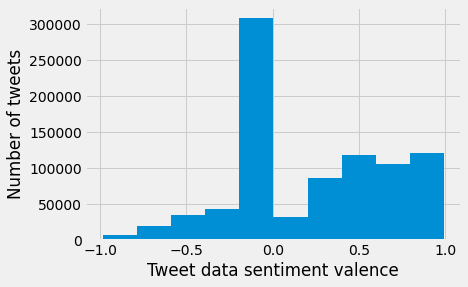

In [10]:
bitcoin_tweets_df['vader_compound'].plot(kind='hist')
plt.xlabel('Tweet data sentiment valence')
plt.ylabel('Number of tweets')
plt.show()